# Health Insurance Cost Prediction

### 1.Importing libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 2. Loading the dataset

In [40]:
data=pd.read_csv("insurance.csv")

In [41]:
#to see 1st 5 rows 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The factors that might affect the health insurance cost are:-
* **Age**: Age of the beneficiary
* **Sex**: Gender of the beneficiary
* **BMI**: Body Mass Index (kg / m^2)
* **Children**: Number of children / Number of dependants
* **Smoker**: Does smoke or not
* **Region**: Residential area of the beneficiary

### 3.Analysing the data stats


In [42]:
# size of data
print("size of data is :",data.shape)

size of data is : (1338, 7)


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [44]:
#to see null values
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The datatype of the all the categories are correct, hence no changes needed. Also, there are no null valued elements

In [45]:
data["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

This shows a brief description of the Charges column.<br>
Few observations:-
* The minimum cost of an insurance is 1122
* Around 75% of the charges are below 17,000
* The maximum cost of an insurance is 63770

### Exploratory Data Analysis

Let's analyze the medical insurance charges by age, bmi and children according to the smoking factor

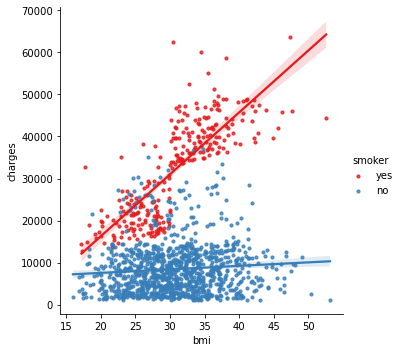

In [46]:
#Plot data and regression model fits across a FacetGrid.It is intended as a convenient interface to fit regression models acrossconditional subsets of a dataset.
#palette=Colors to use for the different levels 
#scatter kws=dictionary where we pass values s=size
sns.lmplot(x="bmi",y="charges",data=data,hue="smoker",palette="Set1",scatter_kws={"s":10})

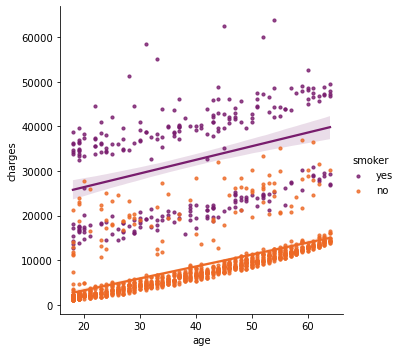

In [47]:
sns.lmplot(x="age",y="charges",data=data,hue="smoker",palette="inferno",scatter_kws={"s":10})
plt.show()

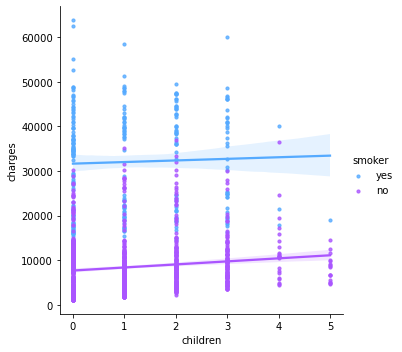

In [48]:
sns.lmplot(x='children',y="charges",data=data,hue="smoker",palette="cool",scatter_kws={"s":10})

Smoking has the highest impact on the medical insurance costs, even though costs are increasing with age, bmi and children. Also people with children tend to smoke less.

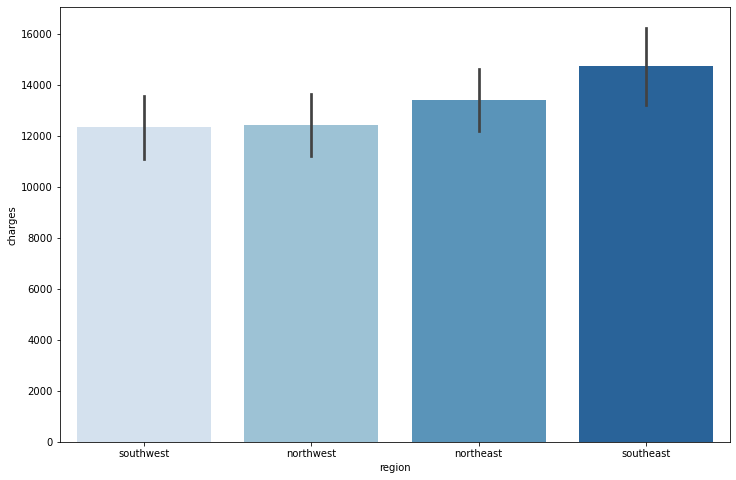

In [49]:
f, axs = plt.subplots(1,1, figsize=(12,8))
plot_order =data.groupby('region')['charges'].sum().sort_values(ascending=True).index.values
sns.barplot(x="region",y="charges",data=data,palette="Blues",order=plot_order)
plt.show()

So overall the highest medical insurance charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region 

<AxesSubplot:xlabel='region', ylabel='charges'>

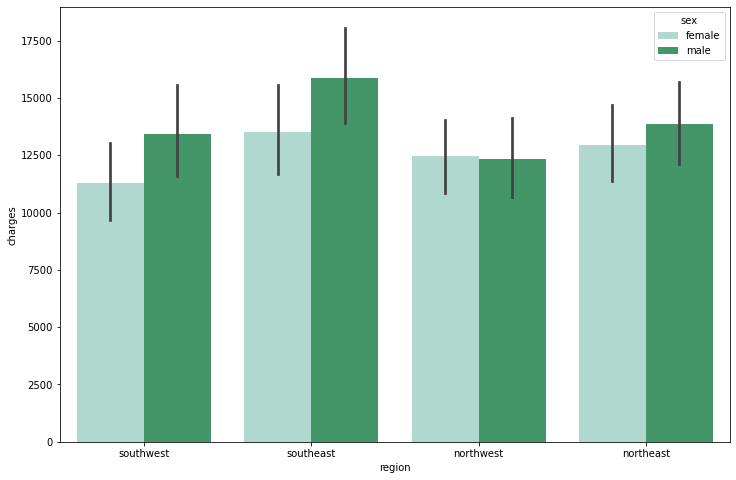

In [50]:
f,axs=plt.subplots(1,1,figsize=(12,8))
sns.barplot(x="region",y="charges",hue="sex",data=data,palette="BuGn")


<AxesSubplot:xlabel='region', ylabel='charges'>

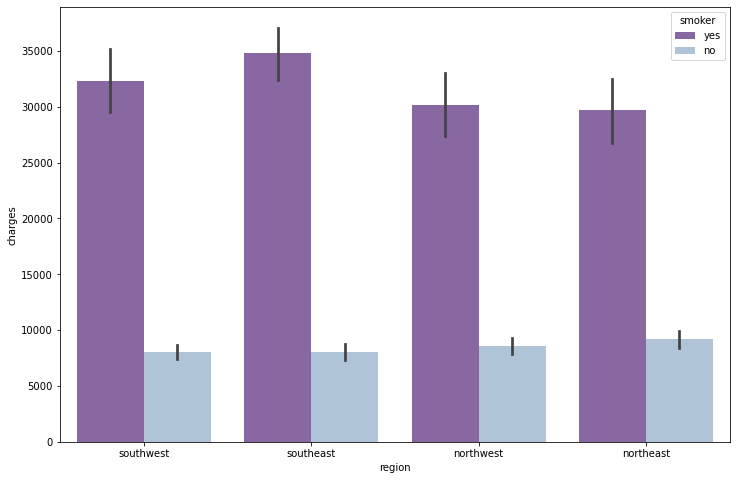

In [51]:
f,axs=plt.subplots(1,1,figsize=(12,8))
sns.barplot(x="region",y="charges",data=data,hue="smoker",palette="BuPu_r")

<AxesSubplot:xlabel='region', ylabel='charges'>

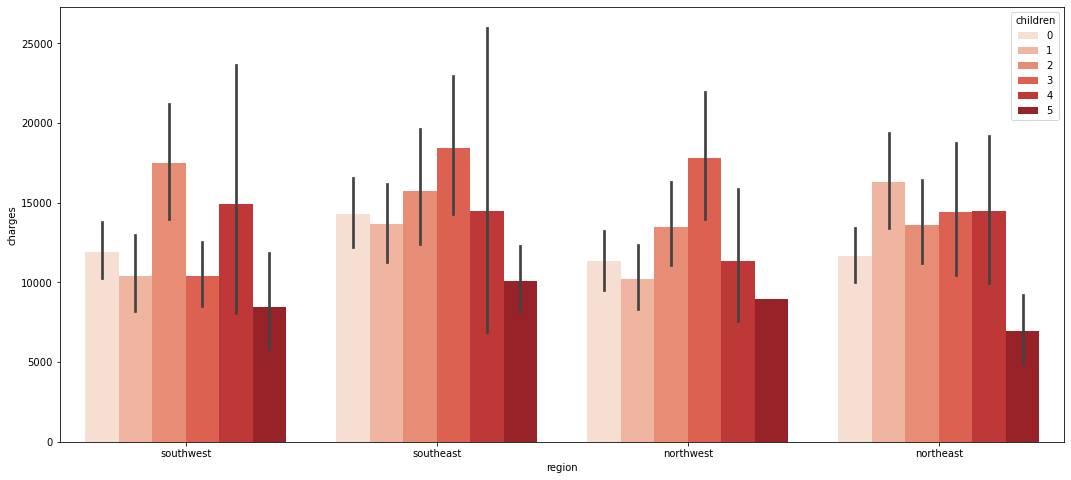

In [52]:
f,axs=plt.subplots(1,1,figsize=(18,8))
sns.barplot(x='region', y='charges', hue='children', data=data, palette='Reds')


From the above graphs we can say that the highest charges are still in Southeast. People in Southeast smoke more than people in Northeast, but people in Northeast have higher charges by gender than in Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well.



### Modifying the data for prediction

In [53]:
data[["sex","smoker","region"]]=data[["sex","smoker","region"]].astype("category")
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

#### Converting category labels into numerical using LabelEncoder

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#encoding sex column
le.fit(data.sex.drop_duplicates())
data.sex=le.fit_transform(data.sex)

#encoding smoker column
le.fit(data.smoker.drop_duplicates())
data.smoker=le.fit_transform(data.smoker)

#encoding region col
le.fit(data.region.drop_duplicates())
data.region=le.fit_transform(data.region)

In [55]:
data.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

<AxesSubplot:>

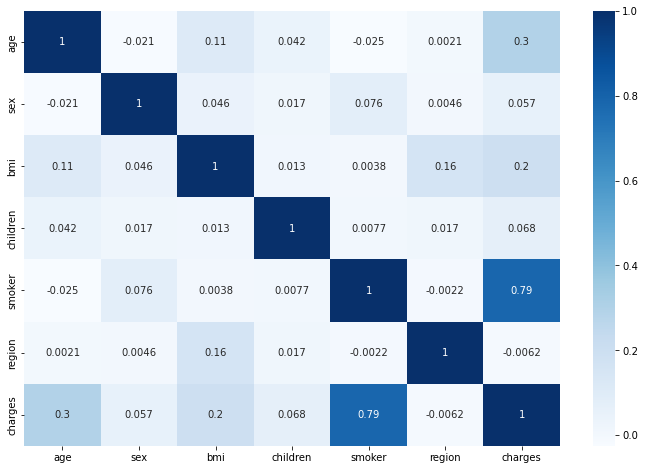

In [56]:
f,axs=plt.subplots(1,1,figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

##### No correlation, except with smoking

In [57]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [58]:
data["region"].unique()

array([3, 2, 1, 0])

Region 0 -> Northeast <br>
Region 1 -> Northwest <br>
Region 2 -> Southeast <br>
Region 3 -> Southwest

## Multiple linear Regression

This is commonly used in predictive analysis. This regression estimates are used to explain the relationship between one dependent variable and one or more independent variables

In [59]:
#independent variable
x=np.array(data.iloc[:,:-1])
#dependent variable
y=np.array(data.iloc[:,-1])

In [60]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [61]:
y_train = y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)

In [62]:
print("size of x",x.shape)

size of x (1338, 6)


In [63]:
print("size of y",y.shape)

size of y (1338,)


In [64]:
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1003, 6)
x_test : (335, 6)
y_train : (1003, 1)
y_test : (335, 1)


## Training the Linear model

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
liner_Reg=LinearRegression()

In [67]:
liner_Reg.fit(x_train,y_train)

LinearRegression()

In [68]:
predict=liner_Reg.predict(x_test)

In [79]:
accuracy=liner_Reg.score(x_test,y_test)
print("accuracy is :",accuracy)

accuracy is : 0.7962732059725786


### Ridge  Regression

In [83]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.5)

In [84]:
r.fit(x_train,y_train)

Ridge(alpha=0.5)

In [86]:
ridge_acc=r.score(x_test,y_test)
print("Ridge accuracy is :",ridge_acc)

Ridge accuracy is : 0.7961319557404142


### Random Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [88]:
random_f=RandomForestRegressor(n_estimators=10,random_state=0)
random_f.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [89]:
x_train.shape

(1003, 6)

In [90]:
x_test.shape

(335, 6)

In [91]:
y_train.shape

(1003, 1)

In [92]:
y_test.shape

(335, 1)

In [95]:
accuracy=random_f.score(x_test,y_test)

In [96]:
print("accuracy is",accuracy)

accuracy is 0.8598387090606794


### Conclusion

* **Smoking** is the greatest factor that affects medical cost charges, then it's **bmi** and **age**.
* **Random Forest Regression** turned out to be the best model